##Hackathon

#1. Conduct Exploratory Data Analysis.

##Import Basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Read input file as DataFrame

In [ ]:
input_data = pd.read_csv('/content/sample_data/test - train.csv')
columns = input_data.columns
input_data.shape

(498513, 4)

##Checking the input data information

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498513 entries, 0 to 498512
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    498513 non-null  int64  
 1   meter          498513 non-null  int64  
 2   timestamp      498513 non-null  object 
 3   meter_reading  498513 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.2+ MB


**The input data has a non-numeric column Timestamp**

## Convert timestamp to numeric using OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

ord_enc = OrdinalEncoder()
ct = ColumnTransformer([('ord_enc', ord_enc, [2])],                        
                        remainder='passthrough'    
                        )
new_data = ct.fit_transform(input_data)
new_columns=['timestamp', 'building_id', 'meter', 'meter_reading']
new_data_df = pd.DataFrame(new_data, columns=new_columns)
new_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498513 entries, 0 to 498512
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      498513 non-null  float64
 1   building_id    498513 non-null  float64
 2   meter          498513 non-null  float64
 3   meter_reading  498513 non-null  float64
dtypes: float64(4)
memory usage: 15.2 MB


## To find the missing values (null values in input)

In [ ]:
new_data_df.isna().sum()

timestamp        0
building_id      0
meter            0
meter_reading    0
dtype: int64

**There are no missing values in the given dataset**

In [ ]:
new_data_df.describe()

,timestamp,building_id,meter,meter_reading
count,498513.000000,498513.000000,498513.000000,4.985130e+05
mean,107.982356,813.646820,0.657554,1.994749e+03
std,62.638052,426.419227,0.933705,9.220850e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,54.000000,414.000000,0.000000,1.210720e+01
50%,108.000000,907.000000,0.000000,6.197520e+01
75%,162.000000,1197.000000,1.000000,2.160000e+02
max,216.000000,1448.000000,3.000000,8.243400e+06


In [ ]:
new_data_df['building_id'].unique()

array([  0.,   1.,   2., ..., 300.,  29., 839.])

##To find the building id and meter where reading is 0

In [ ]:
print(input_data[input_data['meter_reading'] == 0])
zero_reading = input_data[input_data['meter_reading'] == 0]

        building_id  meter           timestamp  meter_reading
0                 0      0  2016-01-01 0:00:00            0.0
1                 1      0  2016-01-01 0:00:00            0.0
2                 2      0  2016-01-01 0:00:00            0.0
3                 3      0  2016-01-01 0:00:00            0.0
4                 4      0  2016-01-01 0:00:00            0.0
...             ...    ...                 ...            ...
498433         1397      1  2016-01-10 0:00:00            0.0
498435         1398      1  2016-01-10 0:00:00            0.0
498458         1411      1  2016-01-10 0:00:00            0.0
498460         1412      1  2016-01-10 0:00:00            0.0
498510         1446      0  2016-01-10 0:00:00            0.0

[61034 rows x 4 columns]


In [ ]:
print(len(input_data.building_id.unique()), input_data.building_id.unique())
print(input_data.meter.unique())

1429 [  0   1   2 ... 300  29 839]
[0 3 1 2]


## Descriptive Statistical Analysis on input data group by Building

In [ ]:
building_df_1 = new_data_df.drop(columns=['timestamp', 'meter'], axis=1)
building_df = building_df_1.groupby(['building_id']).describe().reset_index()
building_df

building_id meter_reading                                         \
                         count        mean       std     min      25%   
0            0.0         217.0    0.000000  0.000000    0.00    0.000   
1            1.0         217.0    0.312027  2.852787    0.00    0.000   
2            2.0         217.0    0.018872  0.161374    0.00    0.000   
3            3.0         217.0    0.000000  0.000000    0.00    0.000   
4            4.0         217.0    0.000000  0.000000    0.00    0.000   
...          ...           ...         ...       ...     ...      ...   
1424      1444.0         217.0    6.722926  2.288732    1.20    4.600   
1425      1445.0         217.0    5.724654  0.607112    4.70    5.225   
1426      1446.0         217.0    1.585138  3.272766    0.00    0.000   
1427      1447.0         217.0  151.452419  8.449519  134.65  144.225   
1428      1448.0         217.0    3.715207  1.026280    1.95    2.850   

                                  
          50%      75%       max  
0       0.000    0.000    0.0000  
1       0.000    0.000   35.2201  
2       0.000    0.000    1.6381  
3       0.000    0.000    0.0000  
4       0.000    0.000    0.0000  
...       ...      ...       ...  
1424    7.375    8.550   13.2000  
1425    5.725    6.025    8.8500  
1426    0.000    1.050   11.0500  
1427  152.575  157.650  169.0750  
1428    3.425    4.525    6.4750  

[1429 rows x 9 columns]

## Descriptive Statistical Analysis on input data group by Meter type

In [ ]:
meter_df_1 = new_data_df.drop(columns=['building_id', 'timestamp'], axis=1)
meter_df = meter_df_1.groupby(['meter']).describe().reset_index()
meter_df

meter meter_reading                                                        \
                count          mean            std  min       25%       50%   
0   0.0      300817.0    142.352087     332.279473  0.0   14.0000   50.6200   
1   1.0       98666.0    139.158769     379.748552  0.0    0.0000   20.0812   
2   2.0       67957.0  13529.303410  249429.882453  0.0  186.0500  674.0500   
3   3.0       31073.0    593.614321    2045.885618  0.0   23.4457  137.7430   

                         
         75%        max  
0   140.1580     9116.0  
1   114.3275     9268.8  
2  2058.7000  8243400.0  
3   552.6000    92904.0

In [ ]:
X = new_data_df[columns[:-1]]
y = new_data_df[columns[-1]]
X.shape, y.shape

((498513, 3), (498513,))

In [ ]:
print(np.sum(np.where(y == 0, 1, 0)))

61034


## Visualizing Building id vs Meter Reading

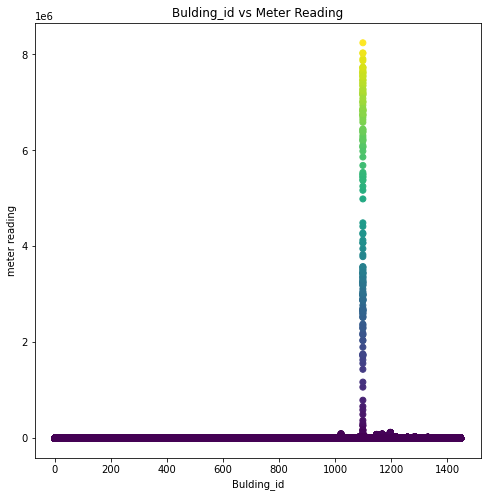

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['building_id'], y, cmap='viridis', c=y)
plt.title('Bulding_id vs Meter Reading')
plt.xlabel('Bulding_id')
plt.ylabel('meter reading')
plt.show()

## Visualizing Meter Type vs Meter Reading

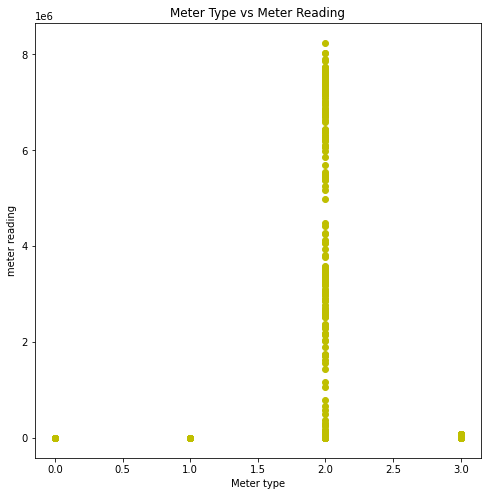

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['meter'], y, cmap='virdis', c='y')
plt.title('Meter Type vs Meter Reading')
plt.xlabel('Meter type')
plt.ylabel('meter reading')
plt.show()

#2. Figure out outliers on the meter reading data set visualising for each unique building and driver. Treat the outliers in the dataset.

## To check for Outliers
Boxplot is a good visualizing technique for finding outliers

###TO check outliers in Building id

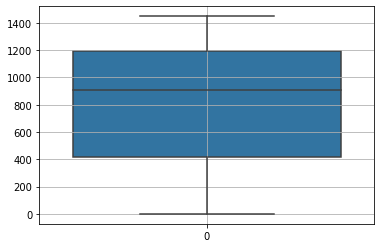

In [ ]:
sns.boxplot(data=X['building_id'])
plt.grid()
# sns.swarmplot(data=X['building_id'],size=2,color='k')
plt.show()

**There are no outliers in Building id column**

###TO check outliers in Meter Type

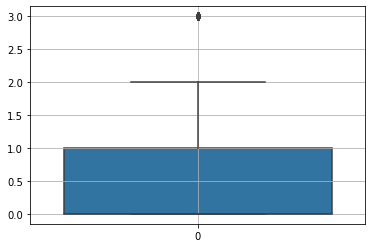

In [ ]:
sns.boxplot(data=X['meter'])
plt.grid()
plt.show()

**There are outliers in meter column**

#3. Visualise normal distribution, compute skewness and treat the dataset accordingly.

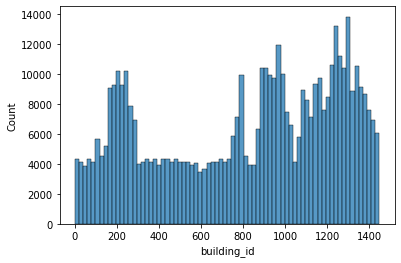

In [ ]:
sns.histplot(X['building_id'])

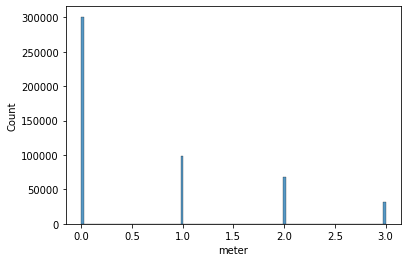

In [ ]:
sns.histplot(X['meter'])

##To standardize the given data
By using StandardScaler the data can be normalized and can 

In [ ]:
plt.figure(figsize=(8,8))
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_new = ss.fit_transform(X)


<Figure size 576x576 with 0 Axes>

###Computing skewness

In [ ]:
from scipy.stats import skew
print('The skewness of the given data: ',skew(X))


The skewness of the given data:  [-3.35586865e-01  1.18836641e+00  4.64600946e-04]
